In [1]:
# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
weather = pd.read_csv("../asset/weather.csv")
key = pd.read_csv("../asset/key.csv")
df_train_with_station_nbr = pd.read_csv("df_train_with_station_nbr_201806202007.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)

import pickle
import awesome_functions as cf

slack_url = pickle.load(open("send_url.pickle", "rb"))
slack_url

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_weather = weather.copy()
df_key = key.copy()
df = df_train_with_station_nbr.copy()

Train data :  (4617600, 4)
Test  data :  (526917, 3)
weather  data :  (20517, 20)


In [2]:
df_weather = weather.copy()

In [3]:
def getCodesumUniqueDataList(df):
    df_codesum = df["codesum"]
    codesum_data_list = []
    for codesum in df_codesum:
        codesum = str(codesum).strip()
        cds = codesum.split(" ")
        if len(cds) != 0:
            for cd in cds:
                if cd != "":
                    if len(cd) > 3:
                        if cd[:2] not in codesum_data_list:
                            codesum_data_list.append(cd[:2])
                        if cd[2:] not in codesum_data_list:
                            codesum_data_list.append(cd[2:])
                    else:   
                        if cd not in codesum_data_list:
                            codesum_data_list.append(cd)
    return codesum_data_list

In [4]:
codesum_list = getCodesumUniqueDataList(df_weather)

In [5]:
codesum_list.append("MO")

In [6]:
codesum_formats = [
 "Rain", "Freezing", "Fog", "Mist", "Unknown Precipitation",\
 "HeavyFog", "Shallow", "Snow", "Haze", "ThunderStorm", "Vicinity",\
 "Drizzle", "Blowing", "Patches", "Widespread Dust", "Squall", "Ice Pellets",\
 "Smoke", "Hail", "Small Hail or Snow Pellets", "Snow Grains", "Partial", "Moderate"
]

In [7]:
codesum_dict = dict(zip(codesum_list, codesum_formats))

In [8]:
codesum_dict

{'RA': 'Rain',
 'FZ': 'Freezing',
 'FG': 'Fog',
 'BR': 'Mist',
 'UP': 'Unknown Precipitation',
 'FG+': 'HeavyFog',
 'MI': 'Shallow',
 'SN': 'Snow',
 'HZ': 'Haze',
 'TS': 'ThunderStorm',
 'VC': 'Vicinity',
 'DZ': 'Drizzle',
 'BL': 'Blowing',
 'BC': 'Patches',
 'DU': 'Widespread Dust',
 'SQ': 'Squall',
 'PL': 'Ice Pellets',
 'FU': 'Smoke',
 'GR': 'Hail',
 'GS': 'Small Hail or Snow Pellets',
 'SG': 'Snow Grains',
 'PR': 'Partial',
 'MO': 'Moderate'}

In [9]:
def setCodesumUniqueDataList(codesum):
    codesums = str(codesum).strip().split(" ")
    
    for cd in codesums:
        if cd != "":
            if len(cd) > 3:
                if cd[:2] == format_d:
                    return 1
                if cd[2:] == format_d:
                    return 1
            else:   
                if cd == format_d:
                    return 1
        else:
            return 0

for fm in codesum_list:
    format_d = fm
    df_weather[fm] = df_weather["codesum"].apply(getCodesumUniqueDataList)

df_weather["MO"] = df_weather["MO"].fillna(1)

In [10]:
rows_num = []
for cd in codesum_list:
    rows_num.append([df_weather[cd].sum(), str(round(df_weather[cd].sum() / len(df_weather) * 100, 2)) + "%"])
    
codesum_num = dict(zip(codesum_list, rows_num))

In [11]:
codesum_num

{'RA': [5325.0, '25.95%'],
 'FZ': [332.0, '1.62%'],
 'FG': [928.0, '4.52%'],
 'BR': [6359.0, '30.99%'],
 'UP': [230.0, '1.12%'],
 'FG+': [837.0, '4.08%'],
 'MI': [52.0, '0.25%'],
 'SN': [1008.0, '4.91%'],
 'HZ': [1482.0, '7.22%'],
 'TS': [1888.0, '9.2%'],
 'VC': [571.0, '2.78%'],
 'DZ': [497.0, '2.42%'],
 'BL': [59.0, '0.29%'],
 'BC': [111.0, '0.54%'],
 'DU': [28.0, '0.14%'],
 'SQ': [14.0, '0.07%'],
 'PL': [20.0, '0.1%'],
 'FU': [33.0, '0.16%'],
 'GR': [3.0, '0.01%'],
 'GS': [5.0, '0.02%'],
 'SG': [1.0, '0.0%'],
 'PR': [1.0, '0.0%'],
 'MO': [9466.0, '46.14%']}

In [12]:
df_weather = df_weather.fillna(0)

In [13]:
df = pickle.load(open("preprocess_date.pkl", "rb"))

In [14]:
df = df.merge(df_weather, on=["date", "station_nbr"], how = "inner")

In [ ]:
# independent two sample test 
for i, codesum in enumerate(codesum_list):
    statistic , p_value = sp.stats.ttest_ind(unitsByCodesum[i], unitsByCodesum[len(unitsByCodesum) - 1], equal_var = False)
    print(unitsByCodesum[i], unitsByCodesum[len(unitsByCodesum) - 1])
    print(codesum)
    print(round(p_value, 5))

In [26]:
df_moderate = df[df["MO"] != 0]

In [54]:
df_moderate_units = df_moderate[df_moderate["units"] != 0]

In [59]:
def getUnitsByCodesum(df):
    result_li = []
    for codesum in codesum_list:
        df_ = df[df[codesum] != 0]
        day_length = len(df_)
#         print(str(codesum) + "인 Row의 수 : " + str(day_length))
        # independent two sample test 
        statistic , p_value = sp.stats.ttest_ind(df_["units"], df_moderate["units"], equal_var = False)
        if p_value <= 0.01:
            print(codesum_dict[codesum], codesum_num[codesum])
            print(round(p_value, 5))
#         else:
        
#         df_units = df_[df_["units"] != 0]
#         length = len(df_units)
#         print(str(codesum) + "인 날에 팔린 아이템들의 총 량 : " + str(length))
#         result_li.append(round(length/day_length, 2))
#     return result_li

In [64]:
df = df[df["station_nbr"] != 5]

In [66]:
getUnitsByCodesum(df)

Freezing [332.0, '1.62%']
0.0045
Fog [928.0, '4.52%']
0.0
HeavyFog [837.0, '4.08%']
0.0
Haze [1482.0, '7.22%']
0.0
ThunderStorm [1888.0, '9.2%']
0.00873
Drizzle [497.0, '2.42%']
0.0
Blowing [59.0, '0.29%']
0.0021
Patches [111.0, '0.54%']
6e-05
Widespread Dust [28.0, '0.14%']
2e-05
Ice Pellets [20.0, '0.1%']
2e-05


In [16]:
unitsByCodesum = getUnitsByCodesum(df)

RA인 Row의 수 : 57957
RA인 날에 팔린 아이템들의 총 량 : 29522
FZ인 Row의 수 : 4349
FZ인 날에 팔린 아이템들의 총 량 : 2034
FG인 Row의 수 : 10618
FG인 날에 팔린 아이템들의 총 량 : 5037
BR인 Row의 수 : 67319
BR인 날에 팔린 아이템들의 총 량 : 34194
UP인 Row의 수 : 2166
UP인 날에 팔린 아이템들의 총 량 : 1046
FG+인 Row의 수 : 8728
FG+인 날에 팔린 아이템들의 총 량 : 4133
MI인 Row의 수 : 635
MI인 날에 팔린 아이템들의 총 량 : 303
SN인 Row의 수 : 12312
SN인 날에 팔린 아이템들의 총 량 : 5910
HZ인 Row의 수 : 14437
HZ인 날에 팔린 아이템들의 총 량 : 7586
TS인 Row의 수 : 22149
TS인 날에 팔린 아이템들의 총 량 : 11602
VC인 Row의 수 : 5537
VC인 날에 팔린 아이템들의 총 량 : 2977
DZ인 Row의 수 : 3735
DZ인 날에 팔린 아이템들의 총 량 : 2038
BL인 Row의 수 : 759
BL인 날에 팔린 아이템들의 총 량 : 353
BC인 Row의 수 : 1330
BC인 날에 팔린 아이템들의 총 량 : 726
DU인 Row의 수 : 304
DU인 날에 팔린 아이템들의 총 량 : 172
SQ인 Row의 수 : 127
SQ인 날에 팔린 아이템들의 총 량 : 82
PL인 Row의 수 : 161
PL인 날에 팔린 아이템들의 총 량 : 96
FU인 Row의 수 : 597
FU인 날에 팔린 아이템들의 총 량 : 311
GR인 Row의 수 : 16
GR인 날에 팔린 아이템들의 총 량 : 10
GS인 Row의 수 : 68
GS인 날에 팔린 아이템들의 총 량 : 31
SG인 Row의 수 : 4
SG인 날에 팔린 아이템들의 총 량 : 3
PR인 Row의 수 : 4
PR인 날에 팔린 아이템들의 총 량 : 2
MO인 Row의 수 : 104713
MO인 날에 팔린 아이템들

## 그 해당 날들에 팔린 아이템 총 수량 / Weather Event가 발생한 Row의 숫자 

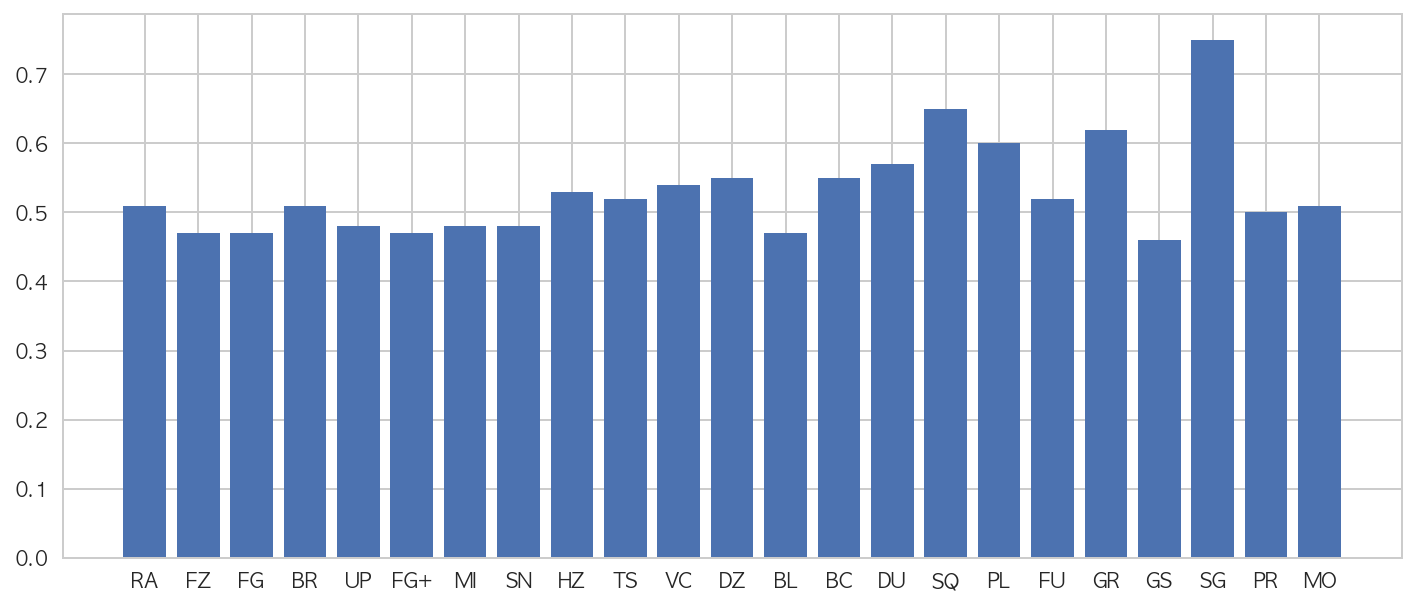

In [17]:
plt.figure(figsize=(12, 5))
plt.bar(codesum_list, unitsByCodesum)
plt.show()

In [19]:
sp.stats.chisquare(np.array(unitsByCodesum) * 100)

Power_divergenceResult(statistic=20.227682227682227, pvalue=0.5688001427593292)